In [181]:
#G2M insight for Cab Investment firm

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestRegressor

In [228]:
cab_data = pd.read_csv("C:/Users/HAZARIKA/Desktop/cab_data.csv")
TransactionID_data = pd.read_csv("C:/Users/HAZARIKA/Desktop/Transaction_ID.csv")
City_data = pd.read_csv("C:/Users/HAZARIKA/Desktop/City.csv")
CustomerID_data = pd.read_csv("C:/Users/HAZARIKA/Desktop/Customer_ID.csv")

In [229]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [230]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [231]:
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [232]:
TransactionID_data.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [233]:
City_data.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [234]:
CustomerID_data.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [235]:
for col in cab_data.columns:
    if ' ' in col:
        cab_data = cab_data.rename(columns={col:col.replace(' ','_')})

In [236]:
for col in TransactionID_data.columns:
    if ' ' in col:
        TransactionID_data = TransactionID_data.rename(columns={col:col.replace(' ','_')})

In [237]:
for col in CustomerID_data.columns:
    if ' ' in col:
        CustomerID_data = CustomerID_data.rename(columns={col:col.replace(' ','_')})

In [238]:
cab_data['Date_of_Travel'] = pd.to_datetime(cab_data['Date_of_Travel'], format='%d/%m/%Y')

In [239]:
months=[]
years =[]
for i in range(len(cab_data['Date_of_Travel'])):
    months.append(cab_data['Date_of_Travel'][i].month)
    years.append(cab_data['Date_of_Travel'][i].year)
cab_data['Month'] = months
cab_data['Year'] = years

cab_data.drop('Date_of_Travel', axis=1, inplace=True)

In [240]:
# before doing EDA, let's split the dataset into Pink Cab and Yellow Cab
PinkCab = cab_data[cab_data['Company']=='Pink Cab']
YellowCab = cab_data[cab_data['Company']=='Yellow Cab']

In [269]:
#Creating Master Data
left = cab_data.set_index(['Transaction_ID'])
right = TransactionID_data.set_index(['Transaction_ID'])
data = left.join(right)
data

,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode
Transaction_ID,,,,,,,,,
10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,29290,Card
10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,27703,Card
10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,1,2016,28712,Cash
10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,1,2016,28020,Cash
10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,1,2016,27182,Card
...,...,...,...,...,...,...,...,...,...
10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1,2018,52392,Cash
10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,1,2018,53286,Cash
10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,1,2018,52265,Cash


In [270]:
left = data.set_index([data.index,'Customer_ID'])
right = CustomerID_data.set_index(['Customer_ID'])
data = left.join(right)
data

,,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month)
Transaction_ID,Customer_ID,,,,,,,,,,,
10000011,29290,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,Card,Male,28,10813
10000012,27703,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,Card,Male,27,9237
10000013,28712,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,1,2016,Cash,Male,53,11242
10000014,28020,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,1,2016,Cash,Male,23,23327
10000015,27182,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,1,2016,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
10440101,52392,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1,2018,Cash,Male,24,15651
10440104,53286,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,1,2018,Cash,Male,32,6528
10440105,52265,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,1,2018,Cash,Male,56,7966


In [271]:
left = data.set_index([data.index,'City'])
right = City_data.set_index(['City'])
data = left.join(right)
data

,,,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
Transaction_ID,Customer_ID,City,,,,,,,,,,,,
10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.6350,1,2016,Card,Male,28,10813,"814,885","24,701"
10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.8540,1,2016,Card,Male,27,9237,"814,885","24,701"
10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.6320,1,2016,Cash,Male,53,11242,"814,885","24,701"
10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.6020,1,2016,Cash,Male,23,23327,"814,885","24,701"
10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.7760,1,2016,Card,Male,33,8536,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10440101,52392,WASHINGTON DC,Yellow Cab,4.80,69.24,63.3600,1,2018,Cash,Male,24,15651,"418,859","127,001"
10440104,53286,WASHINGTON DC,Yellow Cab,8.40,113.75,106.8480,1,2018,Cash,Male,32,6528,"418,859","127,001"
10440105,52265,WASHINGTON DC,Yellow Cab,27.75,437.07,349.6500,1,2018,Cash,Male,56,7966,"418,859","127,001"


In [272]:
YellowCab = data[data['Company']=='Yellow Cab']
PinkCab = data[data['Company']=='Pink Cab']

In [273]:
YellowCab.drop(['Company', 'Payment_Mode', 'Gender','Population','Users'], axis=1, inplace=True)

C:\Users\HAZARIKA\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [274]:
PinkCab.drop(['Company', 'Payment_Mode', 'Gender','Population','Users'], axis=1, inplace=True)

In [275]:
YellowCab_X = YellowCab.drop(['Price_Charged'], axis=1)
YellowCab_y = YellowCab['Price_Charged'].copy()

In [276]:
PinkCab_X = PinkCab.drop(['Price_Charged'], axis=1)
PinkCab_y = PinkCab['Price_Charged'].copy()

In [277]:
#Yellow Cab base model
import statsmodels.api as sm

In [278]:
x_constant = sm.add_constant(YellowCab_X)
YellowCab_model = sm.OLS(YellowCab_y, x_constant).fit()
YellowCab_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Price_Charged   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                 1.336e+05
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:26:24   Log-Likelihood:            -1.7581e+06
No. Observations:              274681   AIC:                         3.516e+06
Df Residuals:                  274674   BIC:                         3.516e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.774e+04    700.786     39.591      0.000    2.64e+04    2.91e+04
KM_Travelled          20.3282      0.198    102.704      0.000      19.940      20.716
Cost_of_Trip          -0.0052      0.015     -0.346      0.729      -0.034       0.024
Month                 -5.5016      0.080    -68.649      0.000      -5.659      -5.345
Year                 -13.7343      0.347    -39.532      0.000     -14.415     -13.053
Age                   -0.0835      0.022     -3.780      0.000      -0.127      -0.040
Income_(USD/Month)     0.0002   3.49e-05      4.746      0.000    9.73e-05       0.000
==============================================================================
Omnibus:                    51903.377   Durbin-Watson:                   0.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           122747.976
Skew:                           1.070   Prob(JB):                         0.00
Kurtosis:                       5.479   Cond. No.                     4.32e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [279]:
# Cost of Trip,Month, Year, Age, Income are significant variable for Yellow Cab.

In [280]:
#Pink Cab Base Model

In [281]:
x_constant = sm.add_constant(PinkCab_X)
PinkCab_model = sm.OLS(PinkCab_y, x_constant).fit()
PinkCab_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Price_Charged   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 8.871e+04
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:26:27   Log-Likelihood:            -4.7693e+05
No. Observations:               84711   AIC:                         9.539e+05
Df Residuals:                   84704   BIC:                         9.539e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.515e+04    584.885     25.903      0.000     1.4e+04    1.63e+04
KM_Travelled          13.4824      0.165     81.834      0.000      13.160      13.805
Cost_of_Trip           0.0295      0.015      1.985      0.047       0.000       0.059
Month                  1.5216      0.069     21.950      0.000       1.386       1.657
Year                  -7.5169      0.290    -25.924      0.000      -8.085      -6.949
Age                   -0.0400      0.018     -2.185      0.029      -0.076      -0.004
Income_(USD/Month)  3.423e-05    2.9e-05      1.181      0.238   -2.26e-05    9.11e-05
==============================================================================
Omnibus:                    28936.298   Durbin-Watson:                   0.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           273333.925
Skew:                           1.373   Prob(JB):                         0.00
Kurtosis:                      11.360   Cond. No.                     4.33e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [282]:
# Cost_of_Trip,Year, Age, Income are significant variable for Pink Cab.

In [283]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

In [284]:
X_train, X_test, y_train, y_test = train_test_split(YellowCab_X, YellowCab_y, test_size=0.3, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [285]:
train_pred = lin_reg.predict(X_train)
print(f'Train score {np.sqrt(mean_squared_error(y_train, train_pred))}')

predicted = lin_reg.predict(X_test)
print(f'Test score {np.sqrt(mean_squared_error(y_test, predicted))}')

Train score 145.45357735978953
Test score 146.20546493093306


In [286]:
X_train, X_test, y_train, y_test = train_test_split(PinkCab_X, PinkCab_y, test_size=0.3, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [287]:
train_pred = lin_reg.predict(X_train)
print(f'Train score {np.sqrt(mean_squared_error(y_train, train_pred))}')

predicted = lin_reg.predict(X_test)
print(f'Test score {np.sqrt(mean_squared_error(y_test, predicted))}')

Train score 67.2274905248551
Test score 67.92057997441016


In [288]:
#Correlation
PinkCab_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 67768 entries, (10359053, 47887, 'SACRAMENTO CA') to (10085754, 13379, 'SILICON VALLEY')
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             67768 non-null  object 
 1   KM_Travelled        67768 non-null  float64
 2   Price_Charged       67768 non-null  float64
 3   Cost_of_Trip        67768 non-null  float64
 4   Month               67768 non-null  int64  
 5   Year                67768 non-null  int64  
 6   Payment_Mode        67768 non-null  object 
 7   Gender              67768 non-null  object 
 8   Age                 67768 non-null  int64  
 9   Income_(USD/Month)  67768 non-null  int64  
 10  Population          67768 non-null  object 
 11  Users               67768 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 21.1+ MB


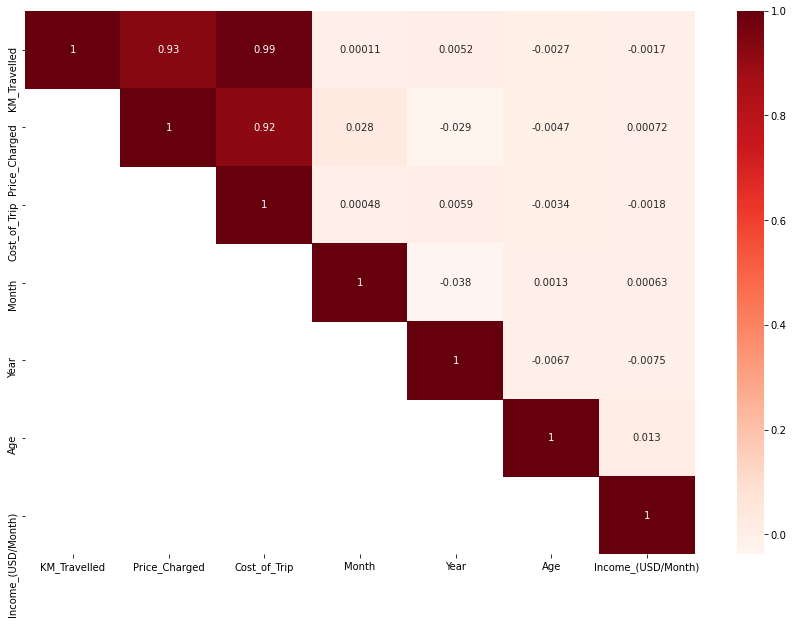

In [289]:
plt.figure(figsize=(15,10))
corr_m = PinkCab_data.corr()
x = np.tri(corr_m.shape[0],k=-1)
sns.heatmap(corr_m, annot=True, cmap=plt.cm.Reds, mask=x)
plt.show()

In [290]:
corr_m['Price_Charged'].abs().sort_values(ascending=False)[1:]

KM_Travelled          0.928129
Cost_of_Trip          0.922215
Year                  0.028888
Month                 0.027863
Age                   0.004710
Income_(USD/Month)    0.000725
Name: Price_Charged, dtype: float64

In [291]:
#Correlation
YellowCab_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 219744 entries, (10411499, 51412, 'WASHINGTON DC') to (10194745, 58301, 'BOSTON MA')
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Company             219744 non-null  object 
 1   KM_Travelled        219744 non-null  float64
 2   Price_Charged       219744 non-null  float64
 3   Cost_of_Trip        219744 non-null  float64
 4   Month               219744 non-null  int64  
 5   Year                219744 non-null  int64  
 6   Payment_Mode        219744 non-null  object 
 7   Gender              219744 non-null  object 
 8   Age                 219744 non-null  int64  
 9   Income_(USD/Month)  219744 non-null  int64  
 10  Population          219744 non-null  object 
 11  Users               219744 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 36.3+ MB


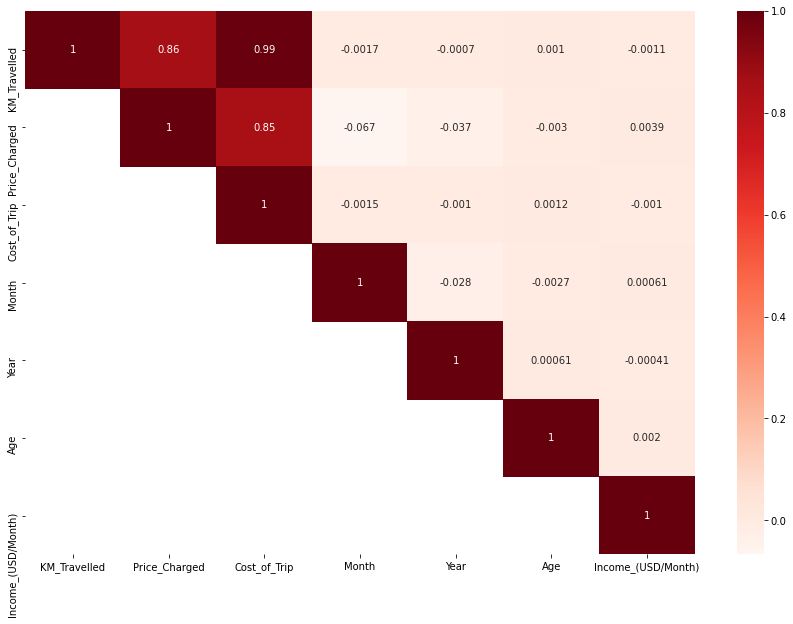

In [292]:
plt.figure(figsize=(15,10))
corr_m = YellowCab_data.corr()
x = np.tri(corr_m.shape[0],k=-1)
sns.heatmap(corr_m, annot=True, cmap=plt.cm.Reds, mask=x)
plt.show()

In [293]:
corr_m['Price_Charged'].abs().sort_values(ascending=False)[1:]

KM_Travelled          0.859776
Cost_of_Trip          0.854154
Month                 0.066689
Year                  0.036652
Income_(USD/Month)    0.003925
Age                   0.003007
Name: Price_Charged, dtype: float64

In [294]:
#From the correlation, we can see KM travelled is correlated with Price Charged,
#followed by Cost of trip.
#Year,Month,Age,Income are not correlated.

In [295]:
#Model Building

In [296]:
#Linear Regression

In [297]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [298]:
#Yellow Cab
X_trainu, X_testu, y_trainu, y_testu = train_test_split(YellowCab_X, YellowCab_y, test_size=0.3, random_state=42)

In [299]:
lin_reg_YellowCab = LinearRegression()
lin_reg_YellowCab.fit(X_trainu, y_trainu)

# print(f'Train score : {lin_reg_YellowCab.score(X_trainu, y_trainu)}')
print(f'Train RMSE score : {np.sqrt(mean_squared_error(y_trainu, lin_reg_YellowCab.predict(X_trainu)))}')
predicted = lin_reg_YellowCab.predict(X_testu)
rmse = np.sqrt(mean_squared_error(y_testu, predicted))
print(f'Test score : {rmse}')

Train RMSE score : 145.45357735978953
Test score : 146.20546493093306


In [300]:
train_cv = cross_val_score(LinearRegression(), X_trainu, y_trainu, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
train_rmse = np.sqrt(np.abs(train_cv)).mean()

test_cv = cross_val_score(LinearRegression(), X_testu, y_testu, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
test_rmse = np.sqrt(np.abs(test_cv)).mean()

l_reg_YellowCab = {}
l_reg_YellowCab['Train'] = round(train_rmse, 4)
l_reg_YellowCab['Test'] = round(test_rmse, 4)
l_reg_YellowCab

{'Train': 145.4599, 'Test': 146.1994}

In [301]:
model = LinearRegression()
model.fit(X_trainu, y_trainu)

LinearRegression()

In [302]:
accuracyl_YellowCab = model.score(X_testu,y_testu)
print('The accuracy is: ' + str(accuracy *100) + '%')

The accuracy is: 79.53544998731715%


In [303]:
#Pink Cab
X_trainl, X_testl, y_trainl, y_testl = train_test_split(PinkCab_X, PinkCab_y, test_size=0.3, random_state=42)

In [304]:
lin_reg_PinkCab = LinearRegression()
lin_reg_PinkCab.fit(X_trainl, y_trainl)

# print(f'Train score : {lin_reg_PinkCab.score(X_trainl, y_trainl)}')
print(f'Train RMSE score : {np.sqrt(mean_squared_error(y_trainl, lin_reg_PinkCab.predict(X_trainl)))}')
predicted = lin_reg_PinkCab.predict(X_testl)
rmse = np.sqrt(mean_squared_error(y_testl, predicted))
print(f'Test score : {rmse}')

Train RMSE score : 67.2274905248551
Test score : 67.92057997441016


In [305]:
train_cv = cross_val_score(LinearRegression(), X_trainl, y_trainl, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
train_rmse = np.sqrt(np.abs(train_cv)).mean()

test_cv = cross_val_score(LinearRegression(), X_testl, y_testl, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
test_rmse = np.sqrt(np.abs(test_cv)).mean()

l_reg_PinkCab = {}
l_reg_PinkCab['Train'] = round(train_rmse, 4)
l_reg_PinkCab['Test'] = round(test_rmse, 4)
l_reg_PinkCab

{'Train': 67.2351, 'Test': 67.9136}

In [306]:
model = LinearRegression()
model.fit(X_trainl, y_trainl)

LinearRegression()

In [307]:
accuracyl_PinkCab = model.score(X_testl,y_testl)
print('The accuracy is: ' + str(accuracy *100) + '%')

The accuracy is: 79.53544998731715%


In [308]:
#Decision Tree

In [309]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_curve

In [310]:
#YellowCab
X_trainu, X_testu, y_trainu, y_testu = train_test_split(YellowCab_leX, YellowCab_ley, test_size=0.3, random_state=42)

In [311]:
dtree = DecisionTreeRegressor()

dtree.fit(X_trainu, y_trainu)

train_pred = dtree.predict(X_trainu)

tr_rmse = np.sqrt(mean_squared_error(y_trainu, train_pred))
print(f'Train score : {tr_rmse}')
predicted = dtree.predict(X_testu)
rmse = np.sqrt(mean_squared_error(y_testu, predicted))
print(f'Test score : {rmse}')

Train score : 0.0
Test score : 107.38901959911598


In [312]:
max_depth = range(1,20)
train_results = []
test_results = []
for n in max_depth:
    dt = DecisionTreeRegressor(max_depth=n)
    dt.fit(X_trainu, y_trainu)
    train_pred = dt.predict(X_trainu)
    rmse = np.sqrt(mean_squared_error(y_trainu, train_pred))
    train_results.append(rmse)
    y_pred = dt.predict(X_testu)
    ts_rmse = np.sqrt(mean_squared_error(y_testu, y_pred))
    test_results.append(ts_rmse)

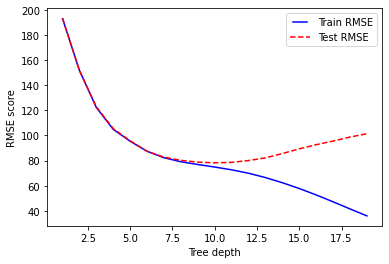

In [313]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth, train_results, 'b', label='Train RMSE')
line2, = plt.plot(max_depth, test_results, 'r--', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE score')
plt.xlabel('Tree depth')
plt.show()

In [314]:
dtree = DecisionTreeRegressor(max_depth=5)

dtree.fit(X_trainu, y_trainu)

train_pred = dtree.predict(X_trainu)

tr_rmse = np.sqrt(mean_squared_error(y_trainu, train_pred))
print(f'Train score : {tr_rmse}')
predicted = dtree.predict(X_testu)
rmse = np.sqrt(mean_squared_error(y_testu, predicted))
print(f'Test score : {rmse}')

Train score : 95.37274326703752
Test score : 95.70676224817525


In [315]:
train_cv = cross_val_score(DecisionTreeRegressor(), X_trainu, y_trainu, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
train_rmse = np.sqrt(np.abs(train_cv)).mean()

test_cv = cross_val_score(DecisionTreeRegressor(), X_testu, y_testu, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
test_rmse = np.sqrt(np.abs(test_cv)).mean()

dt_reg_YellowCab = {}
dt_reg_YellowCab['Train'] = round(train_rmse, 4)
dt_reg_YellowCab['Test'] = round(test_rmse, 4)
dt_reg_YellowCab

{'Train': 107.3967, 'Test': 109.458}

In [316]:
model = DecisionTreeRegressor()
model.fit(X_trainu, y_trainu)

DecisionTreeRegressor()

In [317]:
accuracyd_YellowCab = model.score(X_testu,y_testu)
print('The accuracy is: ' + str(accuracy *100) + '%')

The accuracy is: 79.53544998731715%


In [318]:
#Pink Cab
X_trainl, X_testl, y_trainl, y_testl = train_test_split(PinkCab_leX, PinkCab_ley, test_size=0.3, random_state=42)

In [319]:
dtree = DecisionTreeRegressor(max_depth=5)

dtree.fit(X_trainl, y_trainl)

train_pred = dtree.predict(X_trainl)

tr_rmse = np.sqrt(mean_squared_error(y_trainl, train_pred))
print(f'Train score : {tr_rmse}')
predicted = dtree.predict(X_testl)
rmse = np.sqrt(mean_squared_error(y_testl, predicted))
print(f'Test score : {rmse}')

Train score : 65.6478538497753
Test score : 67.71697075737548


In [320]:
train_cv = cross_val_score(DecisionTreeRegressor(), X_trainl, y_trainl, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
train_rmse = np.sqrt(np.abs(train_cv)).mean()

test_cv = cross_val_score(DecisionTreeRegressor(), X_testl, y_testl, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
test_rmse = np.sqrt(np.abs(test_cv)).mean()

dt_reg_PinkCab = {}
dt_reg_PinkCab['Train'] = round(train_rmse, 4)
dt_reg_PinkCab['Test'] = round(test_rmse, 4)
dt_reg_PinkCab

{'Train': 80.7492, 'Test': 84.4882}

In [321]:
model = DecisionTreeRegressor()
model.fit(X_trainl, y_trainl)

DecisionTreeRegressor()

In [322]:
accuracyd_PinkCab = model.score(X_testl,y_testl)
print('The accuracy is: ' + str(accuracy *100) + '%')

The accuracy is: 79.53544998731715%


In [323]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [324]:
#Yellow Cab
X_trainu, X_testu, y_trainu, y_testu = train_test_split(YellowCab_leX, YellowCab_ley, test_size=0.3, random_state=42)

In [325]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(X_trainu, y_trainu)

train_pred = rf.predict(X_trainu)

tr_rmse = np.sqrt(mean_squared_error(y_trainu, train_pred))
print(f'Train score : {tr_rmse}')
predicted = rf.predict(X_testu)
rmse = np.sqrt(mean_squared_error(y_testu, predicted))
print(f'Test score : {rmse}')

Train score : 28.714092703615776
Test score : 77.09513584259375


In [326]:
train_cv = cross_val_score(RandomForestRegressor(), X_trainu, y_trainu, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
train_rmse = np.sqrt(np.abs(train_cv)).mean()

test_cv = cross_val_score(RandomForestRegressor(), X_testu, y_testu, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
test_rmse = np.sqrt(np.abs(test_cv)).mean()

rf_reg_YellowCab = {}
rf_reg_YellowCab['Train'] = round(train_rmse, 4)
rf_reg_YellowCab['Test'] = round(test_rmse, 4)
rf_reg_YellowCab

{'Train': 77.2731, 'Test': 78.4734}

In [327]:
model = RandomForestRegressor()
model.fit(X_trainu, y_trainu)

RandomForestRegressor()

In [328]:
accuracyr_YellowCab = model.score(X_testu,y_testu)
print('The accuracy is: ' + str(accuracy *100) + '%')

The accuracy is: 79.53544998731715%


In [329]:
#Pink Cab
X_trainl, X_testl, y_trainl, y_testl = train_test_split(PinkCab_leX, PinkCab_ley, test_size=0.3, random_state=42)

In [330]:
rf = RandomForestRegressor()
rf.fit(X_trainl, y_trainl)

train_pred = rf.predict(X_trainl)

tr_rmse = np.sqrt(mean_squared_error(y_trainl, train_pred))
print(f'Train score : {tr_rmse}')
predicted = rf.predict(X_testl)
rmse = np.sqrt(mean_squared_error(y_testl, predicted))
print(f'Test score : {rmse}')

Train score : 21.451967760297414
Test score : 58.73671832322166


In [331]:
train_cv = cross_val_score(RandomForestRegressor(), X_trainl, y_trainl, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
train_rmse = np.sqrt(np.abs(train_cv)).mean()

test_cv = cross_val_score(RandomForestRegressor(), X_testl, y_testl, cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
test_rmse = np.sqrt(np.abs(test_cv)).mean()

rf_reg_PinkCab = {}
rf_reg_PinkCab['Train'] = round(train_rmse, 4)
rf_reg_PinkCab['Test'] = round(test_rmse, 4)
rf_reg_PinkCab

{'Train': 57.4761, 'Test': 59.7556}

In [332]:
model = RandomForestRegressor()
model.fit(X_trainl, y_trainl)

RandomForestRegressor()

In [333]:
accuracyr_PinkCab = model.score(X_testl,y_testl)
print('The accuracy is: ' + str(accuracy *100) + '%')

The accuracy is: 79.53544998731715%


In [334]:
final_results = pd.DataFrame([l_reg_YellowCab,dt_reg_YellowCab,
                              rf_reg_YellowCab],
                            index=['Linear Regression','Decision Tree','Random Forest'])
final_results

,Train,Test
Linear Regression,145.4599,146.1994
Decision Tree,107.3967,109.4580
Random Forest,77.2731,78.4734


In [335]:
final_results = pd.DataFrame([l_reg_PinkCab,dt_reg_PinkCab,
                              rf_reg_PinkCab],
                            index=['Linear Regression',
                                  'Decision Tree', 'Random Forest'])
final_results

,Train,Test
Linear Regression,67.2351,67.9136
Decision Tree,80.7492,84.4882
Random Forest,57.4761,59.7556


In [336]:
final_results = pd.DataFrame([str(accuracyl_YellowCab *100) + '%', str(accuracyd_YellowCab *100) + '%',str(accuracyr_YellowCab *100) + '%'],
                            index=['Linear Regression',
                                  'Decision Tree', 'Random Forest'],columns=['Accuracy'])
final_results

,Accuracy
Linear Regression,74.43906127028283%
Decision Tree,86.11582117196697%
Random Forest,92.85776861169764%


In [337]:
final_results = pd.DataFrame([str(accuracyl_PinkCab *100) + '%', str(accuracyd_PinkCab *100) + '%',str(accuracyr_PinkCab *100) + '%'],
             
                             index=['Linear Regression',
                                  'Decision Tree', 'Random Forest'],columns=['Accuracy'])
final_results

,Accuracy
Linear Regression,86.06270464033021%
Decision Tree,79.66683587364297%
Random Forest,89.78196675241622%
